In [1]:
#!conda install -c conda-forge r-base -y
import numpy as np
import pickle
from plotnine import *
import pandas as pd 

In [2]:
! conda install -c conda-forge r-irkernel -y

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - r-irkernel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    r-base64enc-0.1_3          | r41h06615bd_1005          44 KB  conda-for

In [2]:
directory = 'results/2pMix/'
datam = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datam2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)
directory = 'results/2pdeep/'
datad = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datad2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)
directory = 'results/2pshallow/'
datas = pd.read_csv(directory +'rl_1_15pm.txt', sep=",", header=None)
datas2 = pd.read_csv(directory +'rl_2_15pm.txt', sep=",", header=None)

In [3]:
dfm1= pd.DataFrame([datam.iloc[168] ]).T
dfm2= pd.DataFrame([datam2.iloc[168] ]).T
dfm1['scenario'] = "mix"
dfm2['scenario'] = "mix"
dfm1['phenotype'] = "shallow1"
dfm2['phenotype'] = "deep1"
dfm1['depth'] = np.array(list(range(60))) +0.5
dfm2['depth'] = np.array(list(range(60))) +0.5


dfd1= pd.DataFrame([datad.iloc[168] ]).T
dfd2= pd.DataFrame([datad2.iloc[168] ]).T
dfd1['scenario'] = "deep"
dfd2['scenario'] = "deep"
dfd1['phenotype'] = "deep1"
dfd2['phenotype'] = "deep2"
dfd1['depth'] = np.array(list(range(60))) +0.5
dfd1['depth'] = np.array(list(range(60))) +0.5


dfs1= pd.DataFrame([datas.iloc[168] ]).T
dfs2= pd.DataFrame([datas2.iloc[168] ]).T
dfs1['scenario'] = "shallow"
dfs2['scenario'] = "shallow"
dfs1['phenotype'] = "shallow1"
dfs2['phenotype'] = "shallow2"
dfs1['depth'] = np.array(list(range(60))) +0.5
dfs2['depth'] = np.array(list(range(60))) +0.5

df3 = pd.concat([dfm1, dfm2,dfd1,dfd2,dfs1,dfs2])
df3 = df3.rename(columns={168: 'RLD'})
print(df3, np.sum(dfm1[168]), np.sum(dfm2[168]), np.sum(dfd1[168]), np.sum(dfd2[168]), np.sum(dfs1[168]), np.sum(dfs2[168]))

         RLD scenario phenotype  depth
0   3.251003      mix  shallow1    0.5
1   3.676033      mix  shallow1    1.5
2   3.123149      mix  shallow1    2.5
3   2.343896      mix  shallow1    3.5
4   2.434026      mix  shallow1    4.5
..       ...      ...       ...    ...
55  0.000000  shallow  shallow2   55.5
56  0.000000  shallow  shallow2   56.5
57  0.000000  shallow  shallow2   57.5
58  0.000000  shallow  shallow2   58.5
59  0.000000  shallow  shallow2   59.5

[360 rows x 4 columns] 18.04206160241336 17.458684440919154 3.2757436627732233 3.2757406933663145 3.7073620384822417 3.7073612871741424


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


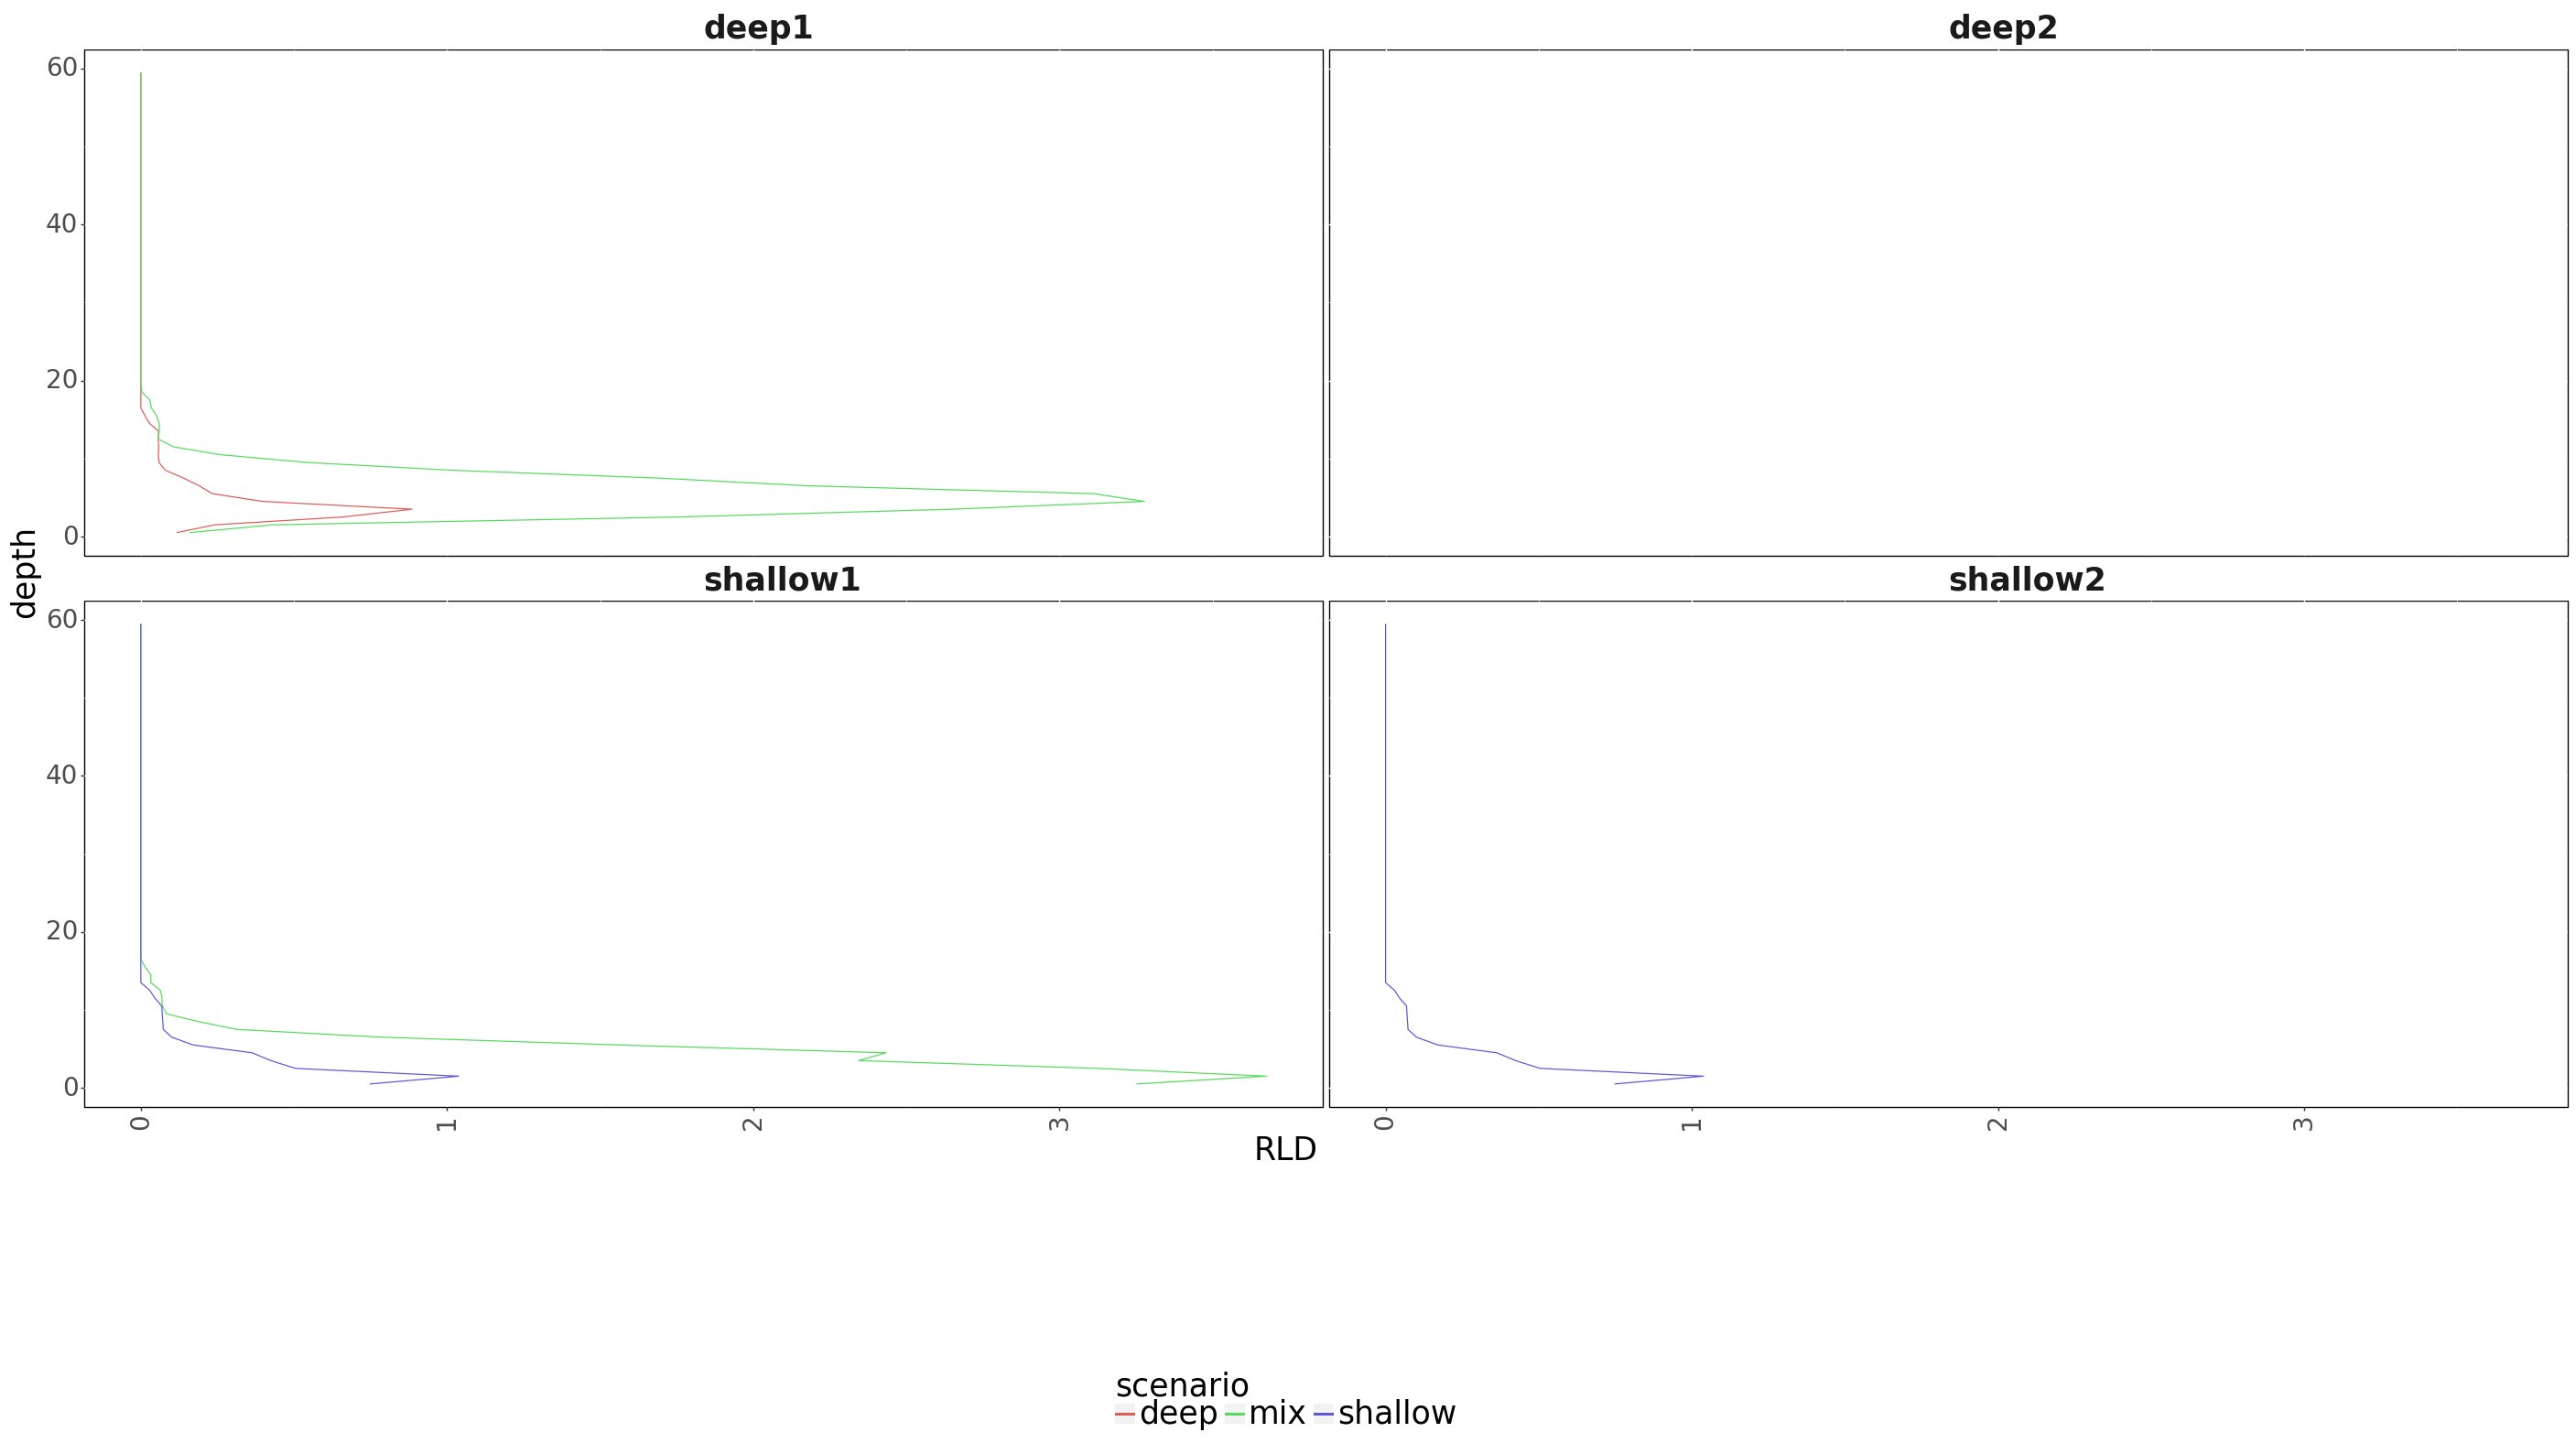

<ggplot: (8770875358293)>

In [4]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='depth', y= "RLD" ,  group="scenario",  color="scenario")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + xlab("depth")
    + coord_flip()
    + facet_wrap("phenotype")
    + ylab("RLD")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 40 rows containing missing values.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


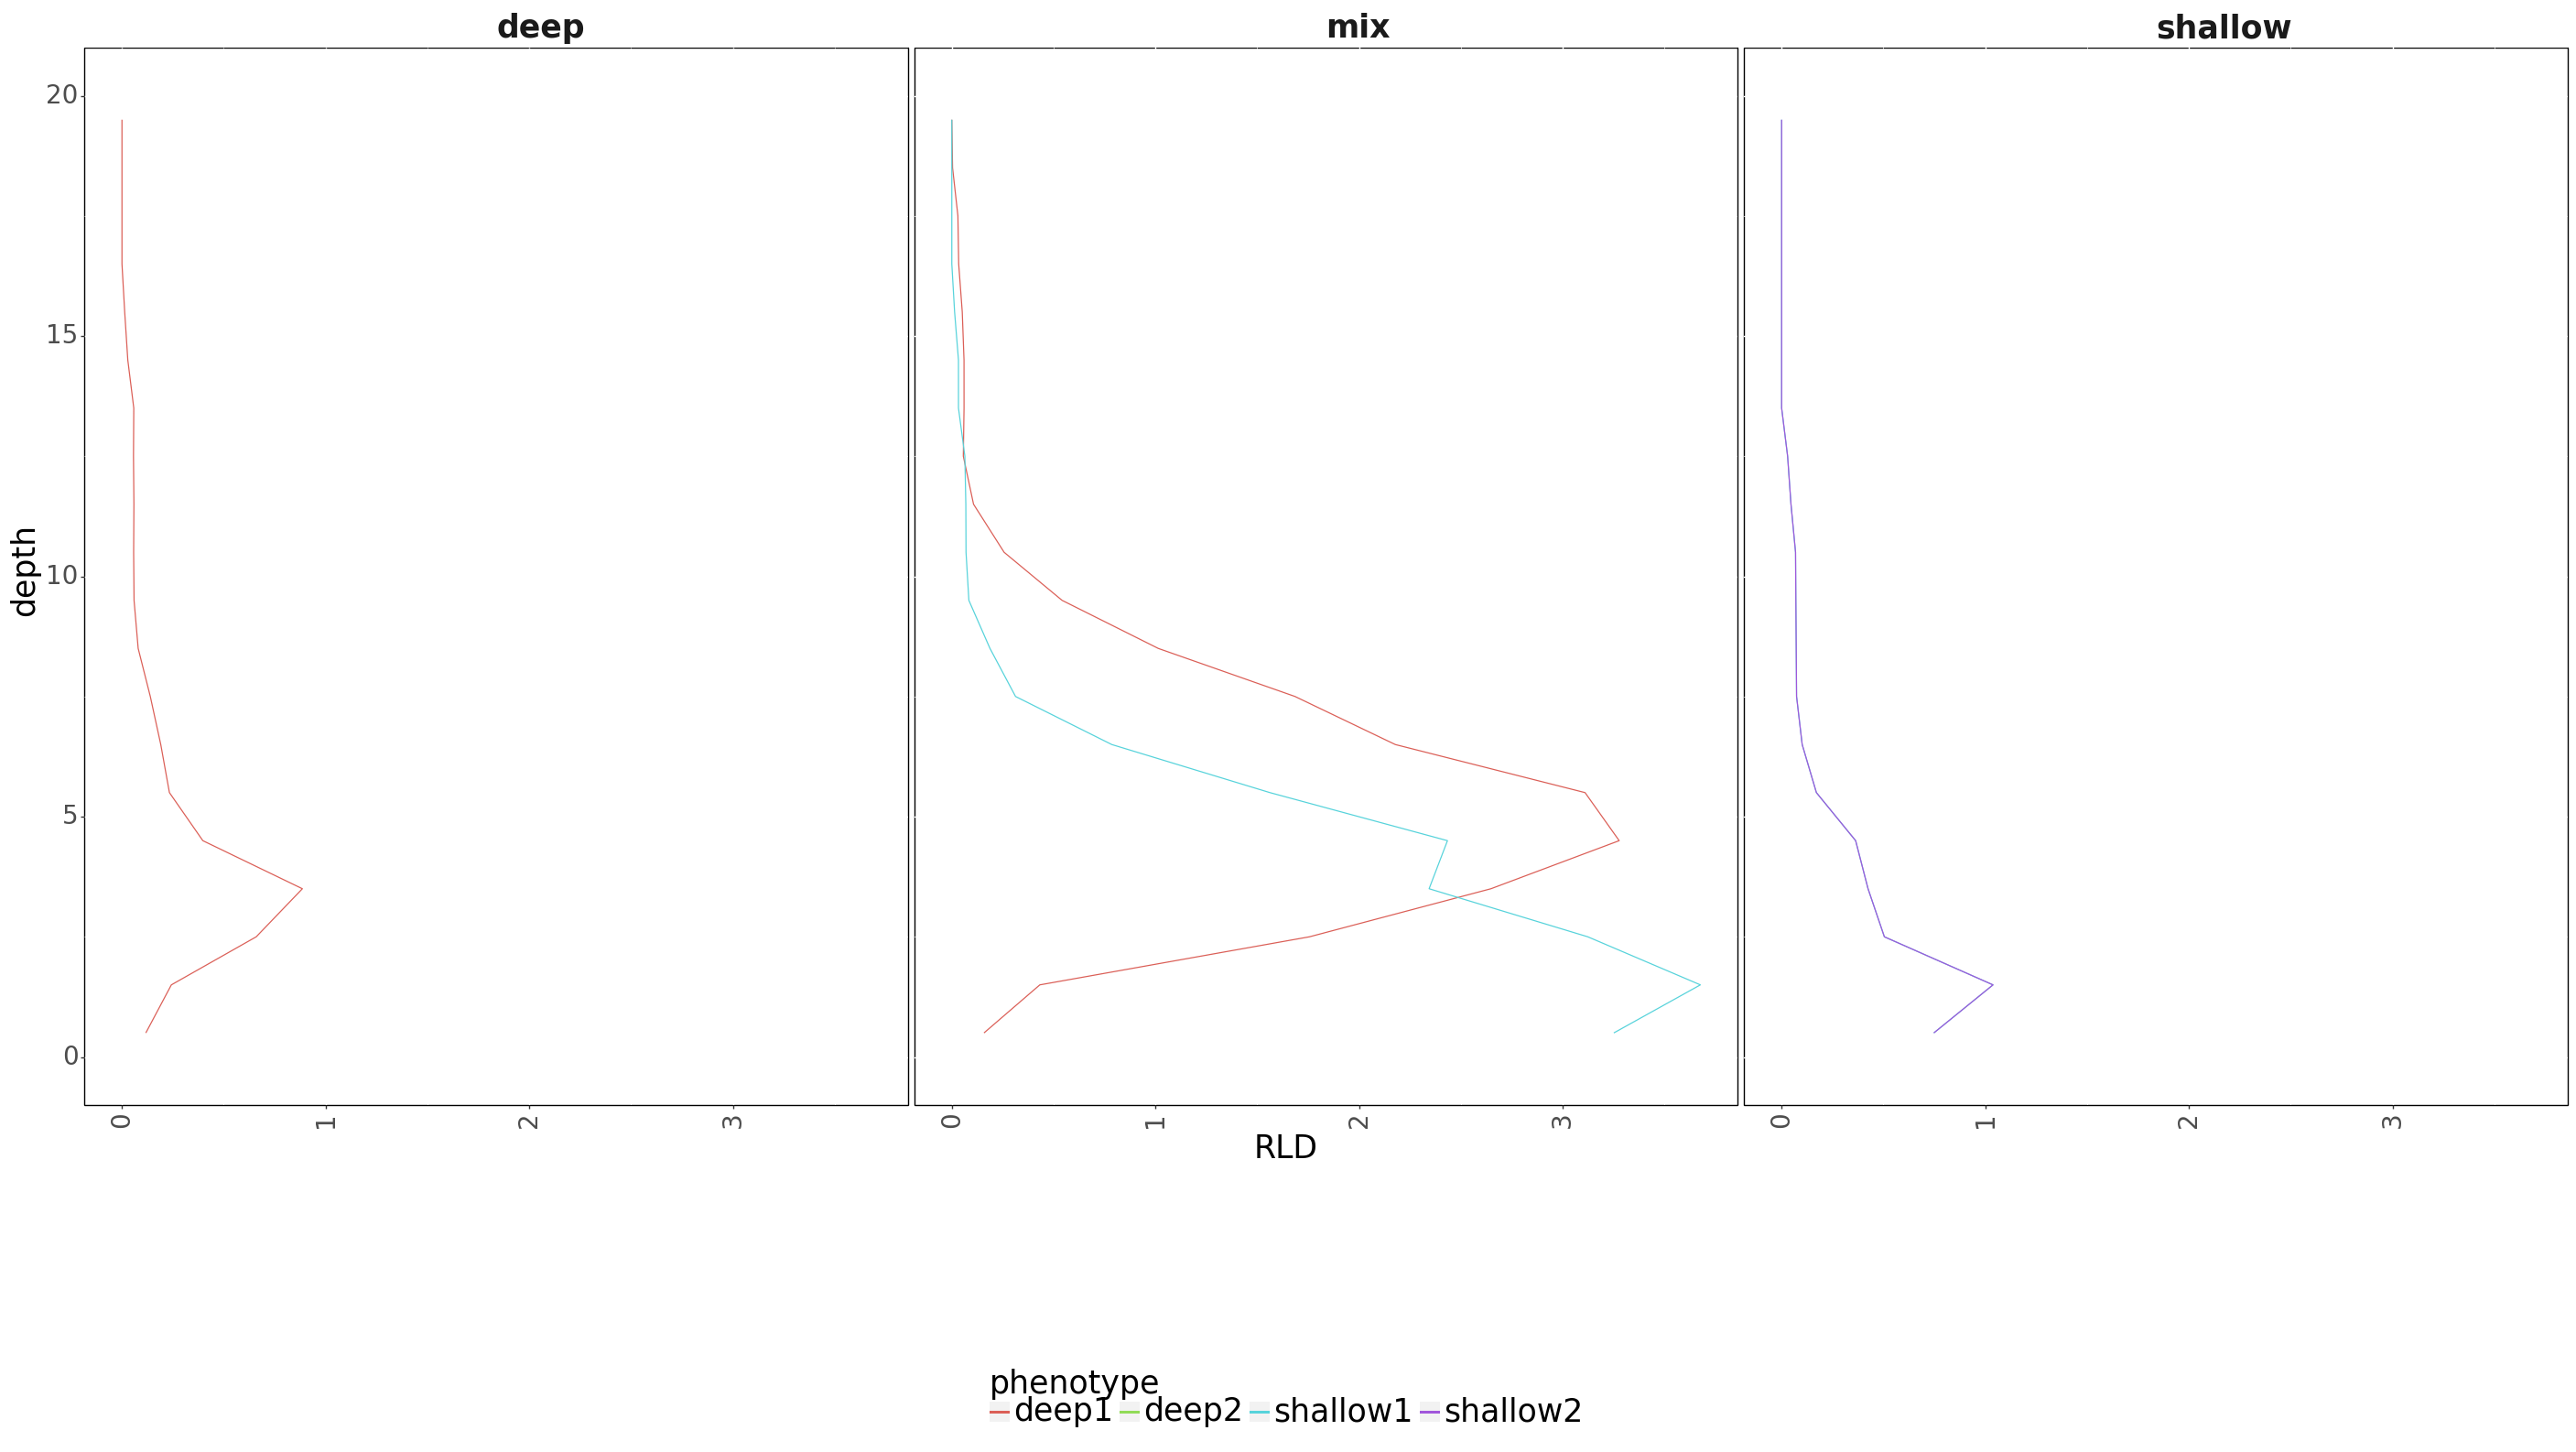

<ggplot: (8770872024926)>

In [5]:
from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='depth', y= "RLD" ,  group="phenotype",  color="phenotype")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
    + xlab("depth")
    + coord_flip()
    + xlim(0,20)
    + facet_wrap("scenario")
    + ylab("RLD")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)